# SparkBenchmark

In [1]:
import matplotlib.pyplot
import time
import matplotlib.pyplot as plt
import numpy as np
import lfunction


# Parametros

### Coloque os nomes das aplicações que servirão de labels para o gráfico

In [2]:

A = 'HD'
B = 'Gluster'
C = 'SSD'


## Parâmetros de Repricação de Workload

In [3]:
test1 = "hd.csv"

test2 = "gluster.csv"

test3 = "ssd.csv"

## Número de Repetições

In [4]:
n1 = 10
n2 = 50
n3 = 250

### Coloque os caminhos desejados dos Datasets

In [5]:
fname = 'Life_Expectancy_Data.csv'

camA = '/home/tiago/Projeto_Final_Database/'
caminhoA = camA + fname  # HD
#caminhoA = '/home/tiago/Projeto_Final_Database/Life_Expectancy_Data.csv' # HD

camB = '/data/Projeto_Final_Database/'
caminhoB = camB + fname  # Gluster
#caminhoB = '/data/Projeto_Final_Database/Life_Expectancy_Data.csv' # Gluster

camC = '/tmp/Projeto_Final_Database/'
caminhoC = camC + fname  # SSD
#caminhoC = '/tmp/Projeto_Final_Database/Life_Expectancy_Data.csv' # SSD


### Logo abaixo você poderá editar título do gráfico e as labels correspondentes de RUN/LOOP (Esses valores não afetam nos testes)


In [6]:
cod = 'LifeExp'
run = '30r'
loop = '5l'

title = 'Desempenho do código ' + cod + ' | ' + run + ' x ' + loop

figName = cod + '_' + run + '_' + loop + '.png'


# Execução

### Abaixo você deve colocar o caminho do código em Python Notebook que deverá ser testado

In [7]:
%%capture

def firstCode():
    try:
        %run ./lifeExpectancy.ipynb
    except:
        print("Não foi possível executar sua aplicação")

def secondCode():
    try:
        %run ./lifeExpectancy.ipynb
    except:
        print("Não foi possível executar sua aplicação")
    
def thirdCode():
    try:
        %run ./lifeExpectancy.ipynb
    except:
        print("Não foi possível executar sua aplicação")

# Testes

### Os valores numericos abaixo correspondem respectivamente, LOOP e RUN (Esses valores afetam no resultado dos testes)

### RUN = Corresponde ao número de vezes que o seu código será executado, a média de tempo é tirada através do número total de RUNS.

### LOOP = Corresponde ao número de vezes que seu código será executado, o desvio padrão é tirado do número total de loops. A cada série de loops será considerado o melhor valor. Ajuste o número de loops de acordo com a necessidade precisão do resultado.

### O número do total de vezes que seu código será executado é definido por LOOP x RUN, tenha isso em mente quando for alterar os valores.

### Atenção: Por padrão o número de runs é definido por 30 conforme abordado no teste amostral do Raj Jain, no entanto você é livre para alterar esse valor

In [8]:
%%capture
path = caminhoA
%store path
a = %timeit -n 5 -r 30 -o firstCode()

In [9]:
%%capture
path = caminhoB
%store path
b = %timeit -n 5 -r 30 -o secondCode()

In [10]:
%%capture
path = caminhoC
%store path
c = %timeit -n 5 -r 30 -o thirdCode()

# Resultados

### O primeiro valor mostrado trata-se da Média Aritmética do Número de Runs

### O segundo valor mostrado trata-se do Desvio padrão

In [11]:
print("")

print("- Tempo de execução " + A + ":")
print(a)

print("")

print("- Tempo de execução " + B + ":")
print(b)

print("")

print("- Tempo de execução " + C + ":")
print(c)



- Tempo de execução HD:
5.26 s ± 594 ms per loop (mean ± std. dev. of 30 runs, 5 loops each)

- Tempo de execução Gluster:
5.18 s ± 103 ms per loop (mean ± std. dev. of 30 runs, 5 loops each)

- Tempo de execução SSD:
5.2 s ± 100 ms per loop (mean ± std. dev. of 30 runs, 5 loops each)


# Gráfico

### Ao final é apresentado um gráfico em barras verticais, e salvo em um arquivo PNG

### Atenção: Por padrão, todos os valores de tempo são convertidos para segundos

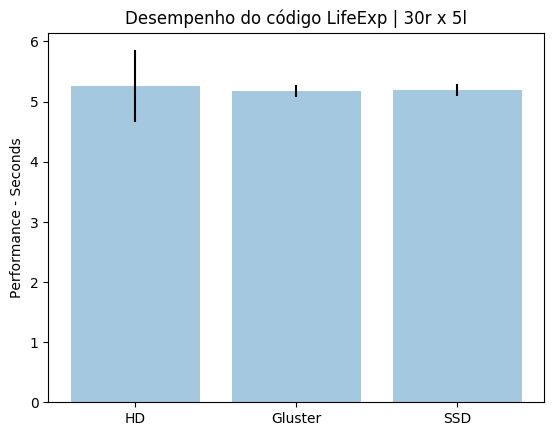

In [12]:
plt.rcdefaults()
fig, ax = plt.subplots()



# Convertendo Objeto para String

a = str(a)
b = str(b)
c = str(c)

# Separando a média/desvio P. de cada componente testado e Convertendo tudo para Segundos caso não esteja

aTime, aDev = lfunction.tratamento(a) 
bTime, bDev = lfunction.tratamento(b)
cTime, cDev = lfunction.tratamento(c)



# Atribuindo todos os dados ao gráfico

people = (A, B, C)
results = (aTime, bTime, cTime)
dev = (aDev, bDev, cDev)

x_pos = np.arange(len(people))
performance = results

error = dev

plt.bar(x_pos, performance, yerr=error, align='center', alpha=0.4)
plt.xticks(x_pos, people)
plt.ylabel('Performance - Seconds')
plt.title(title)


plt.savefig(figName)
plt.show()

In [13]:
%%capture
#path = lfunction.duplicate(camA ,n1, test1, caminhoA)
#path = camA + '10life.csv'
path = '/home/tiago/Projeto_Final_Database/10life.csv'
%store path
a = %timeit -n 1 -r 1 -o firstCode()

In [14]:
%%capture
#path = lfunction.duplicate(camA, n2, test1, caminhoA)
#path = camA + '50life.csv'
path = '/home/tiago/Projeto_Final_Database/50life.csv'
%store path
b = %timeit -n 1 -r 1 -o firstCode()

In [15]:
%%capture
#path = lfunction.duplicate(camA, n3, test1, caminhoA)
#path = camA + '250life.csv'
path = '/home/tiago/Projeto_Final_Database/250life.csv'
%store path
c = %timeit -n 1 -r 1 -o firstCode()

In [16]:
print("")

print("- Tempo de execução " + A + str(n1) + ":")
print(a)

print("")

print("- Tempo de execução " + A +  str(n2) + ":")
print(b)

print("")

print("- Tempo de execução " + A + str(n3) + ":")
print(c)


- Tempo de execução HD10:
7.91 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

- Tempo de execução HD50:
22.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

- Tempo de execução HD250:
1min 34s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


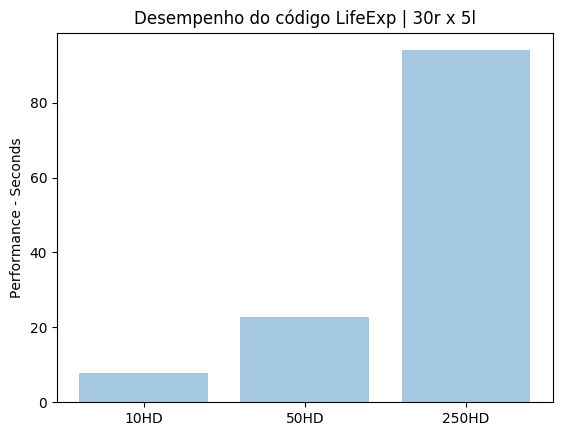

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots()



# Convertendo Objeto para String

a = str(a)
b = str(b)
c = str(c)

# Separando a média/desvio P. de cada componente testado e Convertendo tudo para Segundos caso não esteja

aTime, aDev = lfunction.tratamento(a) 
bTime, bDev = lfunction.tratamento(b)
cTime, cDev = lfunction.tratamento(c)

# Atribuindo todos os dados ao gráfico

people = (str(n1)+A, str(n2)+A, str(n3)+A)
results = (aTime, bTime, cTime)
dev = (aDev, bDev, cDev)

x_pos = np.arange(len(people))
performance = results

error = dev

plt.bar(x_pos, performance, yerr=error, align='center', alpha=0.4)
plt.xticks(x_pos, people)
plt.ylabel('Performance - Seconds')
plt.title(title)


plt.savefig("hardTest" + A + ".png")
plt.show()

In [18]:
%%capture
#path = lfunction.duplicate(camB, n1, test1, caminhoA)
#path = camB + '10life.csv'
path = '/data/Projeto_Final_Database/10life.csv'
%store path
a = %timeit -n 1 -r 1 -o secondCode()

In [19]:
%%capture
#path = lfunction.duplicate(camB, n2, test1, caminhoA)
#path = camB + '50life.csv'
path = '/data/Projeto_Final_Database/50life.csv'
%store path
b = %timeit -n 1 -r 1 -o secondCode()

In [20]:
%%capture
#path = lfunction.duplicate(camB, n3, test1, caminhoA)
#path = camB + '250life.csv'
path = '/data/Projeto_Final_Database/250life.csv'
%store path
c = %timeit -n 1 -r 1 -o secondCode()

In [21]:
print("")

print("- Tempo de execução " + B + str(n1) + ":")
print(a)

print("")

print("- Tempo de execução " + B +  str(n2) + ":")
print(b)

print("")

print("- Tempo de execução " + B + str(n3) + ":")
print(c)


- Tempo de execução Gluster10:
8.31 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

- Tempo de execução Gluster50:
23.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

- Tempo de execução Gluster250:
1min 34s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


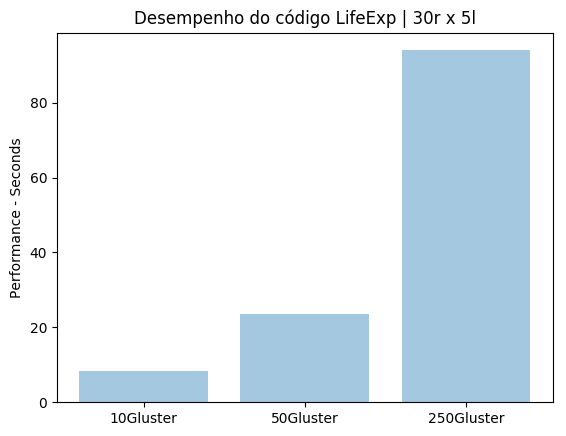

In [22]:
plt.rcdefaults()
fig, ax = plt.subplots()



# Convertendo Objeto para String

a = str(a)
b = str(b)
c = str(c)

# Separando a média/desvio P. de cada componente testado e Convertendo tudo para Segundos caso não esteja

aTime, aDev = lfunction.tratamento(a) 
bTime, bDev = lfunction.tratamento(b)
cTime, cDev = lfunction.tratamento(c)

# Atribuindo todos os dados ao gráfico

people = (str(n1)+B, str(n2)+B, str(n3)+B)
results = (aTime, bTime, cTime)
dev = (aDev, bDev, cDev)

x_pos = np.arange(len(people))
performance = results

error = dev

plt.bar(x_pos, performance, yerr=error, align='center', alpha=0.4)
plt.xticks(x_pos, people)
plt.ylabel('Performance - Seconds')
plt.title(title)


plt.savefig("hardTest" + B + ".png")
plt.show()

In [23]:
%%capture
#path = lfunction.duplicate(camB, n1, test1, caminhoA)
#path = camC + '10life.csv'
path = '/tmp/Projeto_Final_Database/10life.csv'
%store path
a = %timeit -n 1 -r 1 -o thirdCode()

In [24]:
%%capture
#path = lfunction.duplicate(camB, n2, test1, caminhoA)
#path = camC + '50life.csv'
path = '/tmp/Projeto_Final_Database/50life.csv'
%store path
b = %timeit -n 1 -r 1 -o thirdCode()

In [ ]:
%%capture
#path = lfunction.duplicate(camB, n3, test1, caminhoA)
#path = camC + '250life.csv'
path = '/tmp/Projeto_Final_Database/250life.csv'
%store path
c = %timeit -n 1 -r 1 -o thirdCode()

In [ ]:
print("")

print("- Tempo de execução " + C + str(n1) + ":")
print(a)

print("")

print("- Tempo de execução " + C +  str(n2) + ":")
print(b)

print("")

print("- Tempo de execução " + C + str(n3) + ":")
print(c)

In [ ]:

plt.rcdefaults()
fig, ax = plt.subplots()



# Convertendo Objeto para String

a = str(a)
b = str(b)
c = str(c)

# Separando a média/desvio P. de cada componente testado e Convertendo tudo para Segundos caso não esteja

aTime, aDev = lfunction.tratamento(a) 
bTime, bDev = lfunction.tratamento(b)
cTime, cDev = lfunction.tratamento(c)

# Atribuindo todos os dados ao gráfico

people = (str(n1)+C, str(n2)+C, str(n3)+C)
results = (aTime, bTime, cTime)
dev = (aDev, bDev, cDev)

x_pos = np.arange(len(people))
performance = results

error = dev

plt.bar(x_pos, performance, yerr=error, align='center', alpha=0.4)
plt.xticks(x_pos, people)
plt.ylabel('Performance - Seconds')
plt.title(title)


plt.savefig("hardTest" + C + ".png")
plt.show()